
Created on Fri Oct  4 14:32:45 2019

@author: dezsoribli


1. Load hurricane data from the article "Hurricane-induced selection on the morphology of an island lizard".
https://www.nature.com/articles/s41586-018-0352-3
    - A, Drop the lizard with the most missing values
    - B, Drop the ID column
    - C, Encode, the Sex, Origin ans Hurricane values into binary columns,
    and drop the original text columns.
    - D, Make sure all your columns are encoded as floating point values, 
    not unsigned integers!
    
    
2. Use logistic regression from the statsmodels package to predict whether
    the lizard was measured after of before the hurricane, 
    using the whole dataset
    - A, Investigate the Toe and Finger area coefficients, whats going on? 
    Fix this problem by only keeping the mean measurements.
    - B, Which measured quality had the most significant positive effect on survival?
    - C, Which measured quality had the most significant negative effect on survival?
    - D, Try explain the results in your words. Check the abstract of the paper.
    - E, Repeat the fit after scaling each input column to 0 mean and 1 variance. 
    Have the coefficients changed? Have the predictions changed?


3. Repeat the fit with scikit-learn on the unnormalized dataset.
    - A, Compare the coefficients with the ones you got from statsmodels. 
    Are they the same? If not try to answer why?
    - B, Try to tweak the parameters of the scikit-learn method to reproduce the
    the coefficients produced by statsmodels.
    - C, Plot the ROC curve for the full dataset, and calculate the AUC.
    - D, Repeat the fit after scaling each input column to 0 mean and 1 variance. 
    Have the coefficients changed? Have the predictions changed?
    
    
4. Split the dataset into 5 folds and predict each fold by training on the other 4.
    - A, Make sure to fix the seed of the splitting to 0 to make it reproducible.
    - B, Plot the ROC for the 5 folds separately as curves on the same plot.
    - C, Calculate the AUC values for the 5 folds separately.






In [1]:
%pylab inline

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.api as sm
figsize(8,8)
mpl.rcParams['font.size']=16

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('hurricane.csv')  # renamed it


data = data.drop([39])

data['Female'] = pd.get_dummies(data.Sex)['Female'].astype('float')
data['Pine Cay'] = pd.get_dummies(data.Origin)['Pine Cay'].astype('float')
data['After hurricane'] = pd.get_dummies(data.Hurricane)['After'].astype('float')

# only keep numercal data
data_num = data.drop(columns=['ID','Sex','Origin','Hurricane'])

# drop which was not measured
data_num = data_num.drop(columns=['SumFingers','SumToes','MaxFingerForce'])

data_num = data_num.drop(columns=['FingerArea1','FingerArea2','FingerArea3',
                          'ToeArea1','ToeArea2','ToeArea3'])

#data_num = data_num.drop(columns=['FingerCount','ToeCount'])
#
#data_num = data_num.drop(columns=['MeanFingerArea','MeanToeArea'])

#data_num = data_num.drop(columns=['Female','Metatarsal','SVL','Tibia'])

# %%
data_num = sm.add_constant(data_num)



/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


In [4]:
# %%
logit = sm.Logit(data_num['After hurricane'], 
                 data_num.drop(columns=['After hurricane']))
result = logit.fit()
print(result.summary())
pred1=result.predict(data_num.drop(columns=['After hurricane']))

Optimization terminated successfully.
         Current function value: 0.256168
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        After hurricane   No. Observations:                  163
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                           15
Date:                Fri, 04 Oct 2019   Pseudo R-squ.:                  0.6259
Time:                        15:41:55   Log-Likelihood:                -41.755
converged:                       True   LL-Null:                       -111.63
                                        LLR p-value:                 2.588e-22
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             46.4732     11.204      4.148      0.000      24.514      68.433
SVL              

In [5]:
# %% ???
X =  StandardScaler().fit_transform(data_num.drop(columns=['After hurricane','const']))
logit = sm.Logit(data_num['After hurricane'].values.astype('float'), 
                 sm.add_constant(X))
result = logit.fit()
print (result.summary())
pred2=result.predict(sm.add_constant(X))

Optimization terminated successfully.
         Current function value: 0.256168
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  163
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                           15
Date:                Fri, 04 Oct 2019   Pseudo R-squ.:                  0.6259
Time:                        15:41:58   Log-Likelihood:                -41.755
converged:                       True   LL-Null:                       -111.63
                                        LLR p-value:                 2.588e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7351      0.324      2.267      0.023       0.100       1.371
x1            -3.1191      1.

In [6]:
# %%
pred1-pred2

0      7.771561e-15
1      1.110223e-15
2      0.000000e+00
3      0.000000e+00
4      2.886580e-15
5      5.551115e-15
6      2.609024e-15
7      0.000000e+00
8      3.441691e-15
9      0.000000e+00
10     1.110223e-15
11     2.220446e-16
12     1.110223e-15
13    -3.663736e-15
14     7.771561e-16
15     3.330669e-15
16     6.661338e-16
17     4.440892e-16
18     1.554312e-15
19     9.992007e-16
20     2.220446e-16
21     2.220446e-16
22     9.992007e-16
23     2.220446e-16
24     6.661338e-15
25     2.220446e-16
26    -2.220446e-15
27     2.997602e-15
28     2.220446e-16
29     4.440892e-16
           ...     
134   -4.274359e-15
135   -4.874573e-16
136   -8.586881e-17
137   -2.484124e-15
138   -1.491862e-16
139   -8.361367e-16
140    4.662937e-15
141    5.995204e-15
142    1.276756e-15
143   -1.110223e-16
144   -1.762479e-15
145   -2.144118e-15
146    1.110223e-15
147   -8.153200e-16
148   -1.706968e-15
149    5.384582e-15
150    1.942890e-16
151   -1.179612e-15
152    3.885781e-15


In [7]:

# %%
cls = LogisticRegression()
cls.fit(data_num.drop(columns=['After hurricane','const']),
        data_num['After hurricane'])
print (cls.coef_)
pred1 = cls.predict_proba(data_num.drop(columns=['After hurricane','const']))[:,1]

# %%
cls = LogisticRegression()
cls.fit(sm.add_constant(X),
        data_num['After hurricane'])
print (cls.coef_)
pred2 = cls.predict_proba(sm.add_constant(X))[:,1]

# %%
pred1-pred2




[[ 0.04554114 -1.7823243  -0.30337529 -0.06108083 -1.70506902  1.39230212
   0.2203313   0.39376842  0.07844526  1.09892878 -0.02088438  1.18629206
   1.33274758 -0.34572881  0.7630456 ]]
[[ 0.22234396 -0.94557182 -2.42393522 -0.7036805  -0.12256229 -1.89094196
   1.41110982 -0.32962143  0.24677151 -0.07331174  0.9290967  -0.37626081
   1.6842705   1.73926583 -1.01235636  0.45617172]]


array([-2.85954451e-01, -7.09270087e-02,  2.52931727e-02, -3.75112573e-02,
       -1.82868902e-01,  1.22361822e-01, -1.50453050e-01, -1.73057026e-02,
        1.63652417e-02, -4.94673199e-03, -4.76133539e-02, -7.45871174e-02,
        3.71719032e-02,  7.37748272e-02,  1.42450982e-02, -4.13348974e-02,
       -7.55508641e-03, -7.41726008e-03, -1.49086939e-02, -1.84649655e-01,
        5.52245766e-03, -3.44212123e-02,  1.62892696e-02, -6.35571092e-02,
       -1.45604870e-01,  5.98540199e-03, -1.81378497e-02, -5.48721913e-02,
        5.13643126e-02,  2.92396130e-03,  7.37866577e-04, -8.07552701e-02,
       -1.08030644e-02, -1.08872743e-01,  4.59388407e-02, -2.43881395e-02,
        6.87644881e-03, -2.11623133e-02, -7.75186961e-02, -3.38727951e-01,
       -2.86183583e-02, -2.22651867e-01,  2.24155232e-02,  4.58415270e-03,
       -1.91523133e-01, -6.99155595e-02,  1.28553775e-02, -1.05525038e-01,
       -3.51705014e-02, -3.87082513e-03,  5.69454174e-02,  5.72313675e-01,
        1.05548107e-01, -

[[-0.48940382 -2.56746169 -1.14277845  0.79773787 -3.30123013  2.27390672
  -1.11591419  0.9976535  -0.28057054  1.54624263 -0.93732781  5.36681844
   5.25424454 -4.05273037  1.64582975]]


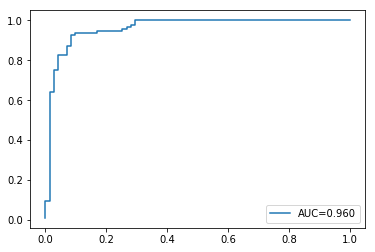

In [12]:



# %%
cls = LogisticRegression(C=1e26)
cls.fit(data_num.drop(columns=['After hurricane','const']),
        data_num['After hurricane'])
print (cls.coef_)
pred1 = cls.predict_proba(data_num.drop(columns=['After hurricane','const']))[:,1]

# %%
xroc,yroc,_ = roc_curve(data_num['After hurricane'],pred1 )
plot(xroc,yroc, label='AUC=%.3f'%roc_auc_score(data_num['After hurricane'],pred1))
legend()



Optimization terminated successfully.
         Current function value: 0.187765
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.264155
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.203891
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.230124
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.289693
         Iterations 8


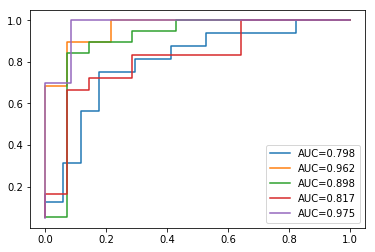

In [13]:
# %%
X = data_num.drop(columns=['After hurricane']).values
y=data_num['After hurricane'].values
np.random.seed(0)
cv = KFold(5, shuffle=True)
for train_idx, test_idx in cv.split(X,y):
    logit = sm.Logit( y[train_idx], X[train_idx])
    result = logit.fit()
    p = result.predict(X[test_idx])
    xroc,yroc,_ = roc_curve(y[test_idx],p)
    plot(xroc,yroc, label='AUC=%.3f'%(roc_auc_score(y[test_idx],p)))
legend()